In [3]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [25]:
train = pd.read_csv('train.csv', encoding='cp949')
test = pd.read_csv('test.csv', encoding='cp949')

In [ ]:
train데이터는 60개 건물 122400개 데이터 
date_time 부분이 중요해 보이고, 2020은 날려버리고, 월하고 일 합친걸로 하나  시간대로 하나 만들면 좋을 거라고 생각(추세선 한번 시각화해서 보면 더 확실할듯)


In [8]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
num           122400 non-null int64
date_time     122400 non-null object
전력사용량(kWh)    122400 non-null float64
기온(°C)        122400 non-null float64
풍속(m/s)       122400 non-null float64
습도(%)         122400 non-null float64
강수량(mm)       122400 non-null float64
일조(hr)        122400 non-null float64
비전기냉방설비운영     122400 non-null float64
태양광보유         122400 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
test 데이터에는 null값이 많음. 
num 하고 date_time 말곤 다 널값이 있음. 심지어 저 두개말고 다 널값으로되어있는 애들도 많음.
이 test 데이터의 null값 채우는 방식이 중요할듯. 

기온, 풍속, 습도 채우는 방법은 
첫번째로 train데이터에서 해당 num의 근접 날짜(ex.8월 20~24일)거 가져와서 그 각각의 시간대의 평균(ex 8월 20~24일 00시 평균 값)을 각 시간대에 넣는 방법
두번째로 train 데이터에서 해당 num의 근접 날짜 데이터의 평균을 그냥 떄려 넣는 법
세번째로 test 데이터에 있는 해당 num 데이터의 평균값 넣는 방법

#네번째로 일조처럼 3칸에 하나씩있는 것으로 보이는데 일조처럼 채우는 방법도 있을듯. (이게 제일 좋아보임.)



강수량과 일조의 경우
각각 6시간 3시간이므로 
강수량은 00시의 데이터를 00시~05시에 모두 적용 이런식으로 채울 수 있을듯. 
일조는 00시의 데이터를 00~02시에 모두적용 
(데이터를 전체다 본 건 아니지만 이런식으로 구성된 거 같길래)


비전기, 태양광보유는 0,1 이진으로 구성되어있는 거고 해당 NUM별로 변하지 않을테니 그냥 train 데이터에 각 num별로 써져있는 거 끌어오면 될듯.




In [9]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
num             10080 non-null int64
date_time       10080 non-null object
기온(°C)          3360 non-null float64
풍속(m/s)         3360 non-null float64
습도(%)           3360 non-null float64
강수량(mm, 6시간)    1680 non-null float64
일조(hr, 3시간)     3360 non-null float64
비전기냉방설비운영       2296 non-null float64
태양광보유           1624 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


In [ ]:
이진데이터인에 제외하면 일조의 수치가 혼자 작은 느낌이 좀 있긴함. 

In [28]:
test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0


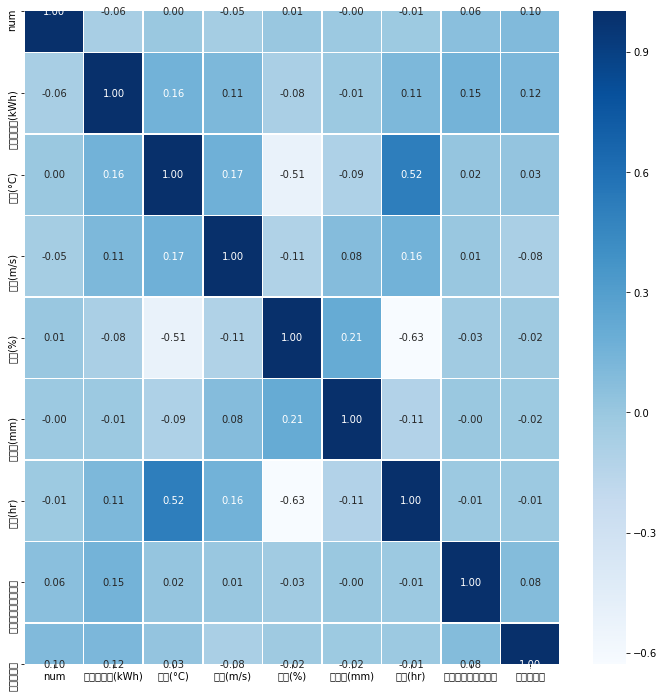

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
전력사용량에 특출나게 corr 높은건 보이지 x 
기온과 일조(hr)이 corr 0.52 나중에 기온만 피처 선택한다든지 하는 것도 방법일듯 혹은 두개를 혼합한 하나의 피처를 만든다든가!

(array([64099., 41138.,  6034.,  5763.,  3649.,   738.,   446.,   118.,
          285.,   130.]),
 array([    0.    ,  1773.9225,  3547.845 ,  5321.7675,  7095.69  ,
         8869.6125, 10643.535 , 12417.4575, 14191.38  , 15965.3025,
        17739.225 ]),
 <a list of 10 Patch objects>)

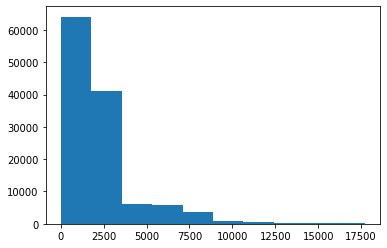

In [11]:
plt.hist(train['전력사용량(kWh)'])

(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        7.4900e+02, 2.3391e+04, 6.1217e+04, 3.1254e+04, 5.7830e+03]),
 array([0.        , 0.97835899, 1.95671799, 2.93507698, 3.91343598,
        4.89179497, 5.87015396, 6.84851296, 7.82687195, 8.80523095,
        9.78358994]),
 <a list of 10 Patch objects>)

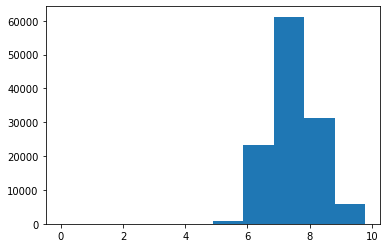

In [13]:
plt.hist(np.log1p(train['전력사용량(kWh)']))

In [ ]:
궁금한 정보 
시설별, 태양광, 비전기 별 전력사용량
시설별 태양광, 비전기 

In [14]:
train[["num", "전력사용량(kWh)"]].groupby(["num"], as_index=False).mean().sort_values(by='전력사용량(kWh)', ascending=False)


,num,전력사용량(kWh)
7,8,8837.364073
0,1,8543.273488
37,38,7588.679824
53,54,6839.836376
30,31,5964.317576
29,30,5761.224314
51,52,3779.359279
41,42,3624.592027
2,3,3371.353699
59,60,3354.771964


In [18]:
train[["num", "비전기냉방설비운영"]].groupby(["num"], as_index=False).mean().sort_values(by='비전기냉방설비운영', ascending=False)

,num,비전기냉방설비운영
30,31,1.0
41,42,1.0
29,30,1.0
1,2,1.0
32,33,1.0
33,34,1.0
34,35,1.0
36,37,1.0
37,38,1.0
38,39,1.0


In [19]:
train[["num", "태양광보유"]].groupby(["num"], as_index=False).mean().sort_values(by='태양광보유', ascending=False)

,num,태양광보유
59,60,1.0
29,30,1.0
22,23,1.0
23,24,1.0
46,47,1.0
25,26,1.0
26,27,1.0
44,45,1.0
43,44,1.0
39,40,1.0


In [20]:
train[["태양광보유", "전력사용량(kWh)"]].groupby(["태양광보유"], as_index=False).mean().sort_values(by='전력사용량(kWh)', ascending=False)

,태양광보유,전력사용량(kWh)
1,1.0,2572.504986
0,0.0,2093.135722


In [21]:
train[["비전기냉방설비운영", "전력사용량(kWh)"]].groupby(["비전기냉방설비운영"], as_index=False).mean().sort_values(by='전력사용량(kWh)', ascending=False)

,비전기냉방설비운영,전력사용량(kWh)
1,1.0,2536.198313
0,0.0,1868.722163


In [17]:
train['num'].value_counts()

60    2040
59    2040
28    2040
27    2040
26    2040
25    2040
24    2040
23    2040
22    2040
21    2040
20    2040
19    2040
18    2040
17    2040
16    2040
15    2040
14    2040
13    2040
12    2040
11    2040
10    2040
9     2040
8     2040
7     2040
6     2040
5     2040
4     2040
3     2040
2     2040
29    2040
30    2040
31    2040
46    2040
58    2040
57    2040
56    2040
55    2040
54    2040
53    2040
52    2040
51    2040
50    2040
49    2040
48    2040
47    2040
45    2040
32    2040
44    2040
43    2040
42    2040
41    2040
40    2040
39    2040
38    2040
37    2040
36    2040
35    2040
34    2040
33    2040
1     2040
Name: num, dtype: int64

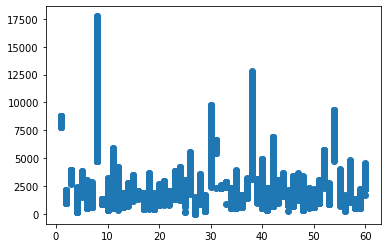

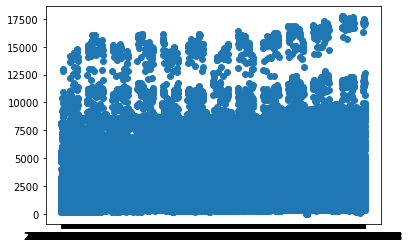

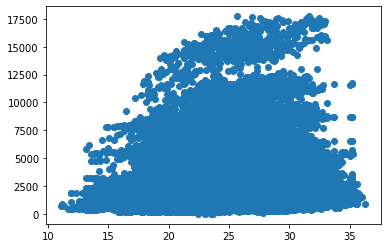

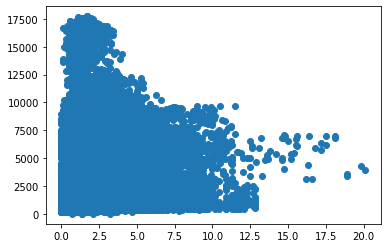

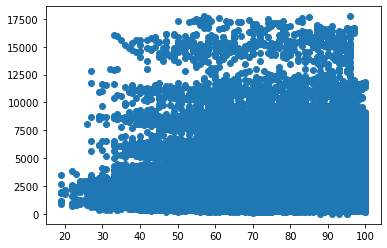

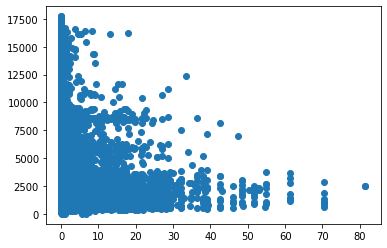

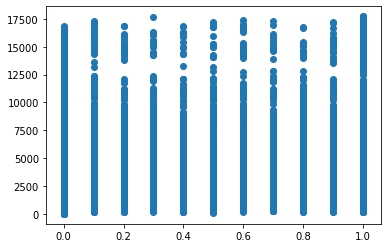

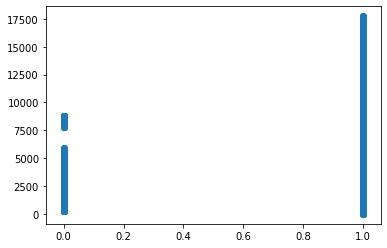

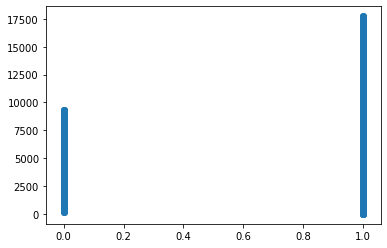

In [26]:

y = train['전력사용량(kWh)']
train_df = train.drop(['전력사용량(kWh)'], axis=1)

for i in range(9):
    x = train_df.iloc[:,i]
    plt.scatter(x, y)
    plt.show()

In [30]:
train_df = train.drop(['date_time'], axis=1)

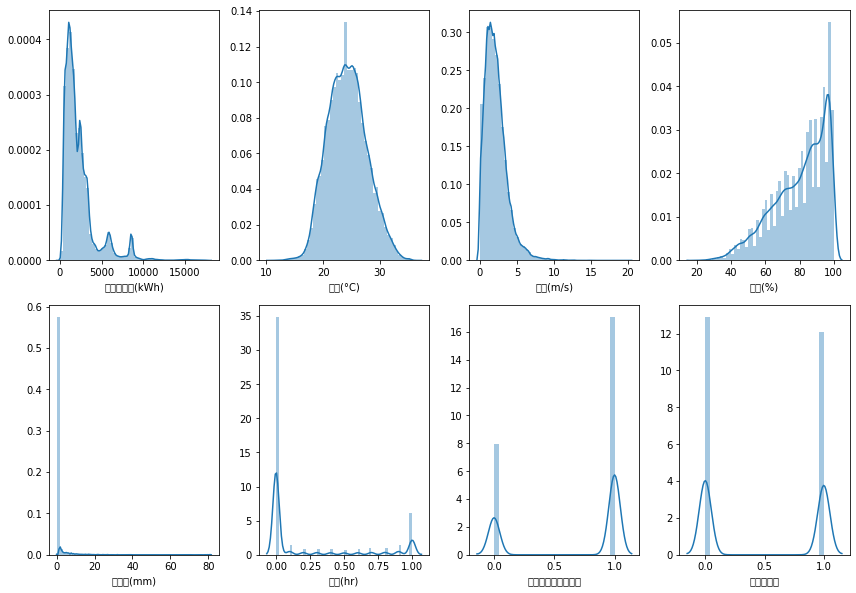

In [32]:
# train의 각 변수별 분포를 살펴봅니다. 
plt.figure(figsize=(12,12))
for i in range(1,9):
    plt.subplot(3,4,i)
    sns.distplot(train_df.iloc[:,i])
plt.tight_layout()
plt.show()